# Load Libraries Test

#### test on import and from

In [1]:
# from : file, import : class
from settings import settings

In [2]:
# test
settings.MyCompanies

['INTC', 'AAPL', 'AMD', 'NVDA', 'GOOG', 'UBER']

In [3]:
settings.API

'yahoo'

# Load Libraries

In [4]:
from settings import settings
from object_factory import object_factory
from mappers import portfolios_allocation_mapper

In [5]:
settings.MyCompanies

['INTC', 'AAPL', 'AMD', 'NVDA', 'GOOG', 'UBER']

# Generate optimum portfolio. Run all functions step by steps

In [6]:
def generate_optimum_portfolio():
    
    #instantiate the objects with the settings
    
    # function lists
    obj_factory = object_factory(settings)
    
    # call functions
    ce = obj_factory.get_companies_extractor() # get companies info
    cp = obj_factory.get_charts_plotter() # get stock charts over given time horizon
    mc = obj_factory.get_metrics_calculator()
    mcs = obj_factory.get_portfolio_generator()
    
    print('0. Get companies')
    companies = ce.get_companies_list()
    print(companies)
    
    price_extractor = obj_factory.get_price_extractor(companies)
#     print(price_extractor)
    
    print('1. Get company stock prices')
    
    end_date = settings.get_end_date()
    start_date = settings.get_start_date(end_date)
    closing_prices = price_extractor.get_prices(settings.PriceEvent, start_date, end_date)
#     print(end_date)
#     print(start_date)
    
    print('2. Plot stock charts')
    #plot stock prices & save data to a file
#     print(closing_prices)
    cp.plot_prices(closing_prices)
    
    print('3. Calculate Daily Returns')
    returns = settings.DailyAssetsReturnsFunction(closing_prices)
    # plot stock daily changes
#     print(returns)
    cp.plot_returns(returns)
    
    print('3.1 Calculate Expected Returns : Cumulative value for 1$ investment')
    # calculate cagr
    cum_return = settings.DailyAssetsCumulativeReturnsFunction(returns)
#     print(cum_return)
    # plot 1$ expected cumulative growth
    cp.plot_cum_daily_return(cum_return)
    
    print('3.2 Calculate Expected Mean Return from daily changes')
    print('To see relation with cumulative value. Getting annual expected return to the power of years of duration.')
    expected_returns = settings.AssetsExpectedReturnsFunction(returns)
#     print(expected_returns)
    cp.plot_expected_returns(expected_returns)
#     print(expected_returns.index)
    
    print('4. Calculate covariance for efficient edge quantification')
    # covariance will be used for optimization after 5
    covariance = settings.AssetsCovarianceFunction(returns)
#     print(covariance)
    
    print('4.1 Visualize daily returns correlation : Scatter')
    cp.plot_correlation_scatter(returns)
#     print(returns.corr())
    
    print('4.2 Calculate daily change correlation coefficiencies : Matrix')
    cp.plot_correlation_matrix(returns)
    
    print('5 Use an optimiser')
    #generate portfolios
    targets = settings.get_my_targets()
    # expected_returns.index returns tickers
    optimiser = obj_factory.get_optimiser(targets, len(expected_returns.index))
    portfolios_allocations_df = optimiser.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
#     print(portfolios_allocations_df)
    # transpose optimisation result, picking up just risk and returns
    portfolio_risk_return_ratio_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)
    
    # transpose optimisation result, showing asset allocation as well as risk and returns
    portfolio_risk_return_allc_ratio_df = portfolios_allocation_mapper.map_to_risk_return_allc_ratio(portfolios_allocations_df)
    print(portfolio_risk_return_allc_ratio_df)
    min_risk = mc.get_min_risk(portfolio_risk_return_allc_ratio_df)
    max_sr = mc.get_max_sharpe_ratio(portfolio_risk_return_allc_ratio_df)
    max_return = mc.get_max_return(portfolio_risk_return_allc_ratio_df)
    min_return = mc.get_min_return(portfolio_risk_return_allc_ratio_df)
    print(max_return)
     
    #plot efficient frontiers
    cp.plot_efficient_frontier(portfolio_risk_return_ratio_df, min_risk, max_sr, max_return, min_return)
    
    print('5.1 Allocation for Mar Sharpe and Min Volatility')
    cp.plot_pie(max_sr, min_risk, max_return, min_return)
    
    print('5.2 Add random data by monte carlo')
    # generate portfolios with allocations
    portfolios_allocations_df = mcs.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
    portfolio_risk_return_ratio_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)

# Execute everything

0. Get companies
  Ticker
0   INTC
1   AAPL
2    AMD
3   NVDA
4   GOOG
5   UBER
--> Initialised Price Extractor
1. Get company stock prices
--> Fetched prices for: INTC
--> Fetched prices for: AAPL
--> Fetched prices for: AMD
--> Fetched prices for: NVDA
--> Fetched prices for: GOOG
--> Fetched prices for: UBER
2. Plot stock charts


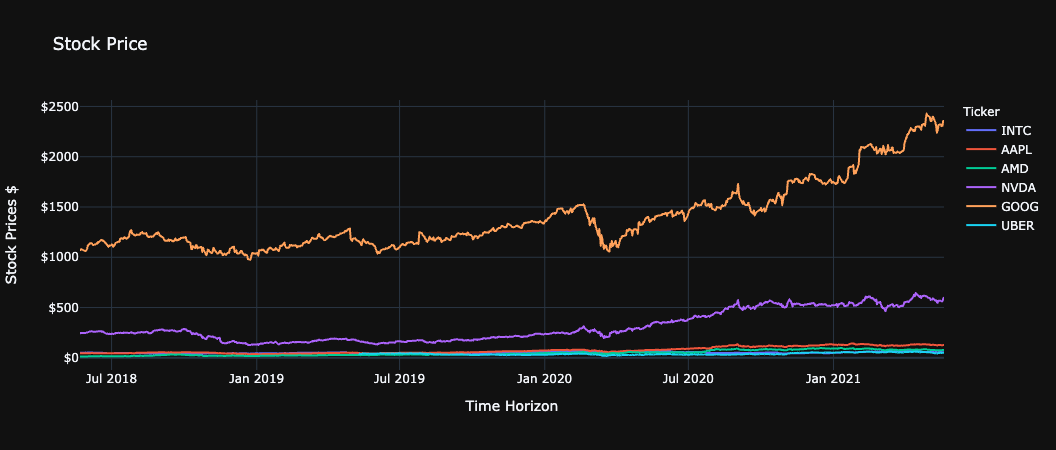

3. Calculate Daily Returns


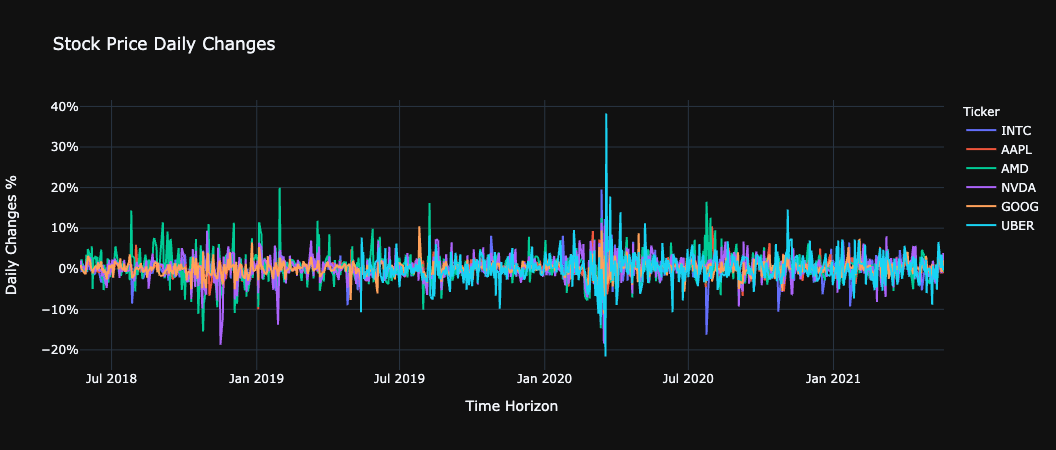

3.1 Calculate Expected Returns : Cumulative value for 1$ investment


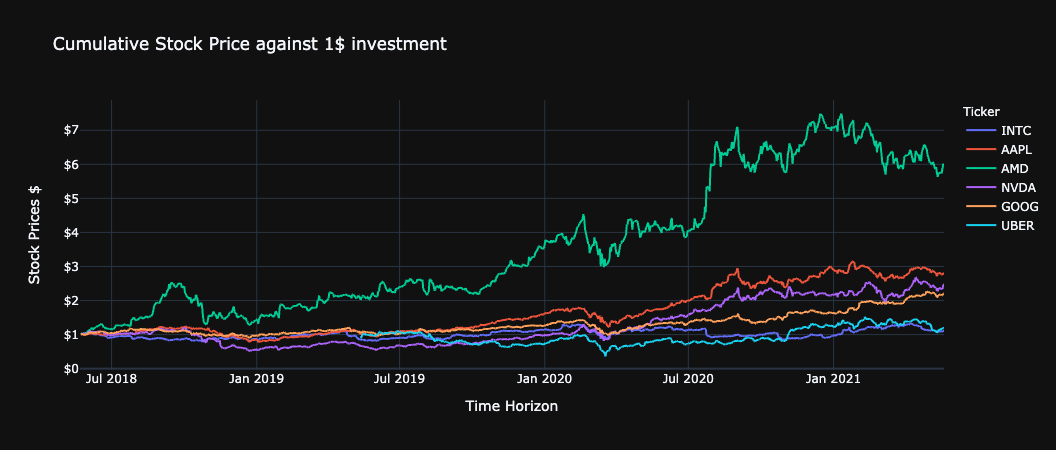

3.2 Calculate Expected Mean Return from daily changes
To see relation with cumulative value. Getting annual expected return to the power of years of duration.


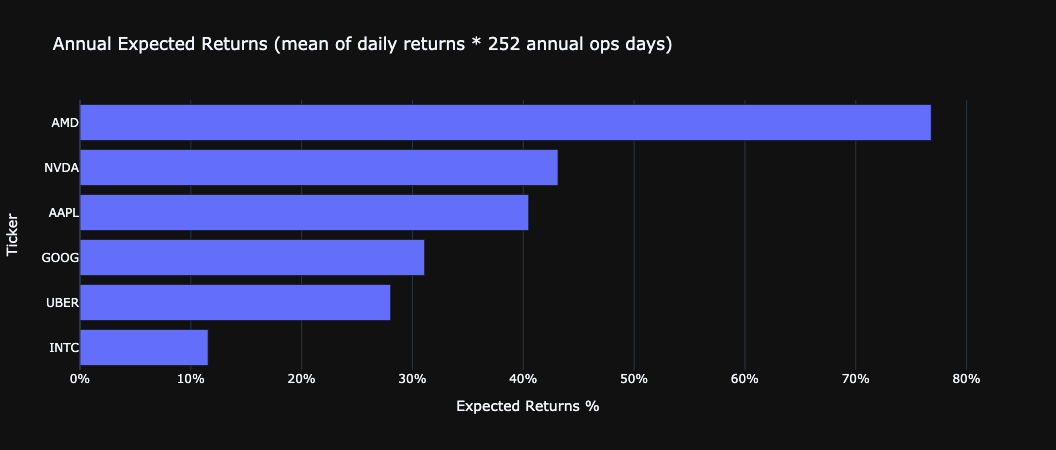

4. Calculate covariance for efficient edge quantification
4.1 Visualize daily returns correlation : Scatter


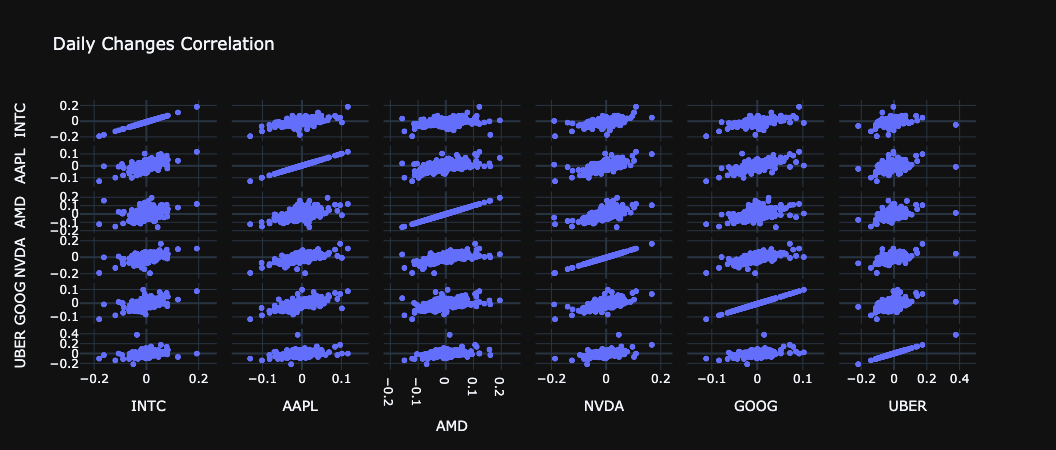

4.2 Calculate daily change correlation coefficiencies : Matrix


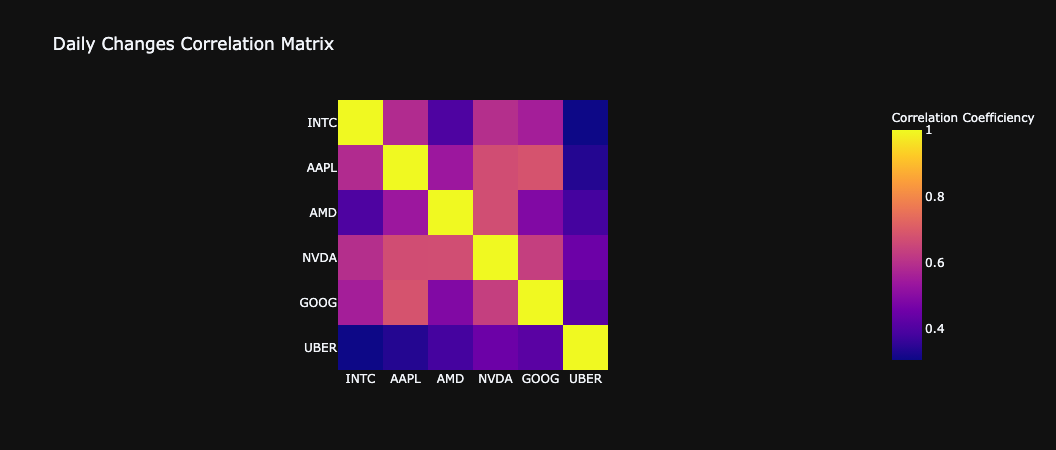

5 Use an optimiser
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.3994133684641147
            Iterations: 16
            Function evaluations: 181
            Gradient evaluations: 12
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.399413368464007
            Iterations: 15
            Function evaluations: 167
            Gradient evaluations: 11
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.3994133684640034
            Iterations: 12
            Function evaluations: 112
            Gradient evaluations: 8
Completed Generating 3 Portfolios
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.36200799996863414
            Iterations: 4
            Function evaluations: 28
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current fun

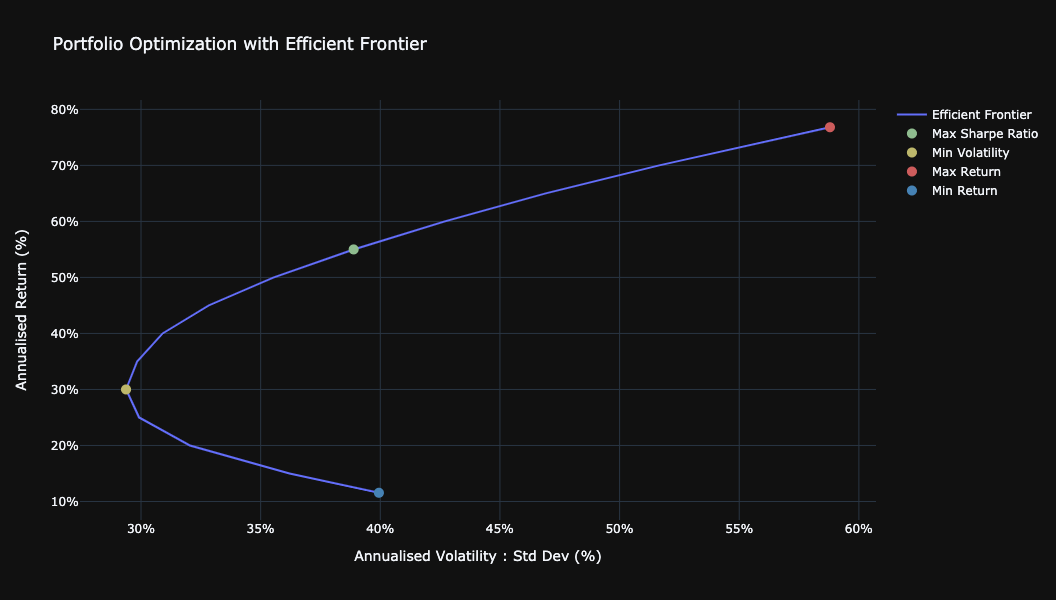

5.1 Allocation for Mar Sharpe and Min Volatility


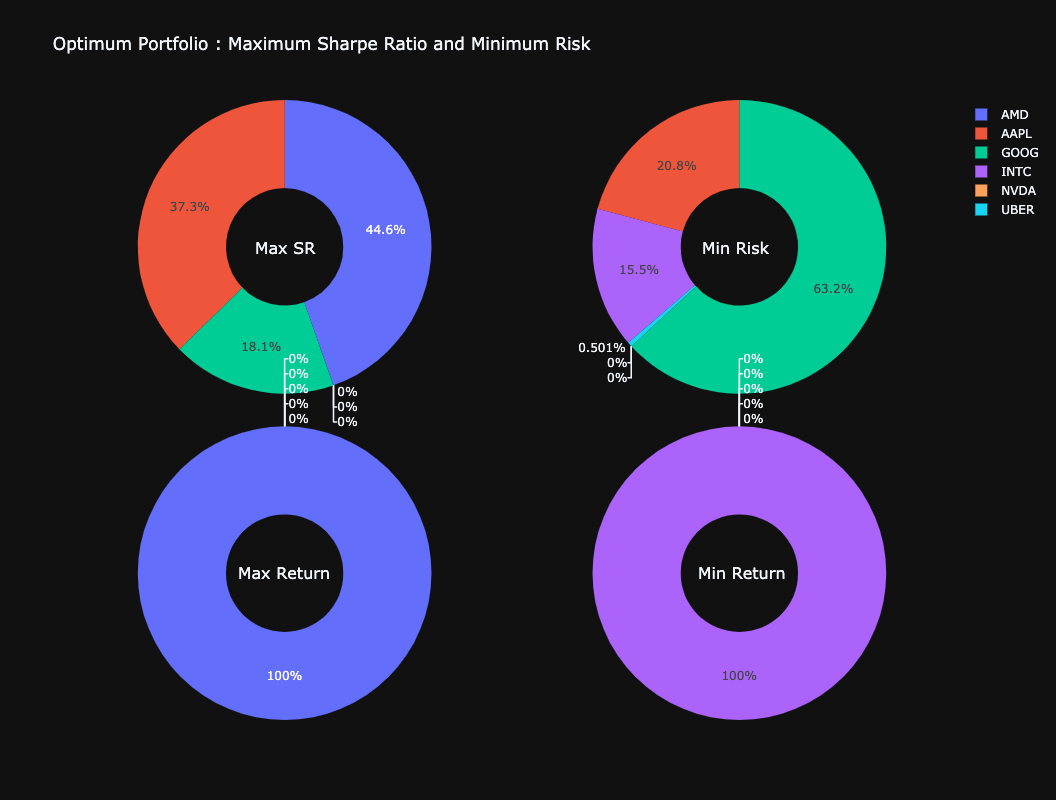

5.2 Add random data by monte carlo
Completed Generating 0Portfolios
Completed Generating 1000Portfolios
Completed Generating 2000Portfolios
Completed Generating 3000Portfolios
Completed Generating 4000Portfolios
Completed Generating 5000Portfolios
Completed Generating 6000Portfolios
Completed Generating 7000Portfolios
Completed Generating 8000Portfolios
Completed Generating 9000Portfolios


In [7]:
generate_optimum_portfolio()